In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns
from scipy.optimize import fmin_tnc
from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.preprocessing import MinMaxScaler # Data normalizer Min Max Scale
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error # Calculate the accuracy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter

## Testing Approach

In [2]:
# Calculations for the minimax
eps_0 = 0.01
epsilon = eps_0  + np.arange(0.0001, 0.01, 0.000001)
alpha = 0.45 # alpha < minimax prob of error

n_limit_INF = np.log(1/(1 - (2*alpha -1)**2)) / ( (epsilon - eps_0) * np.log2(1 + (epsilon - eps_0)/(eps_0 * (1 - epsilon)) ) )

n_limit_SUP = np.log(2 * alpha) / np.log(1 - (epsilon - eps_0)**2 / (8 * (1 - eps_0) * epsilon)) 

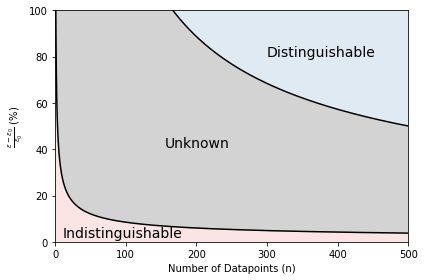

In [3]:
eps_plot = 100 * (epsilon - eps_0) / eps_0
plt.plot(n_limit_INF,eps_plot , color = 'black')
plt.plot(n_limit_SUP,eps_plot, color = 'black')

plt.xlabel('Number of Datapoints (n)')
plt.ylabel(r'$\frac{\epsilon - \epsilon_0}{\epsilon_0}$ (%)')

plt.fill_between(n_limit_INF, 0, eps_plot,
                color="#fae4e4", zorder=0 )
plt.fill_between(n_limit_INF, n_limit_SUP, eps_plot,
                color="lightgray", zorder=0 )
plt.fill_between(n_limit_SUP, 100,eps_plot,
color="#e0eaf3", zorder=0 )

plt.text(300, 80, 'Distinguishable', fontsize = 14)
plt.text(10, 2, 'Indistinguishable', fontsize = 14)
plt.text(155, 41, 'Unknown', fontsize = 14)
plt.xlim([0, 500])
plt.ylim([0.0, 100])

#plt.title('Distinguishability Regions - Testing Approach')
plt.tight_layout()
plt.savefig('Minimax_Indistinguishable_regions.pdf')
plt.show()

In [4]:
def upper_dataset_size(eps_0, eps, alpha):
    return (2*(2*alpha -1)**2)/( (eps - eps_0) * np.log(1 + (eps - eps_0)/(eps_0 * (1 - eps)) ) )

def get_function(eps_0, alpha, n):
    
    def f(eps):
        return np.log(1/(1 - (2*alpha -1)**2)) / ( (eps - eps_0) * np.log(1 + (eps - eps_0)/(eps_0 * (1 - eps)) ) ) - n
    
    return f
def get_function_dist(eps_0, alpha, n):
    
    def f(eps):
        return np.log(1/(1 - (2*alpha -1)**2)) / ( (eps - eps_0) * np.log(1 + (eps - eps_0)/(eps_0 * (1 - eps)) ) ) - n
    
    return f

#upper_dataset_size(0.01, 0.0105, 0.45),  optimize.newton(0, 1.5)
g = get_function(0.01, 0.4, 1000)
optimize.newton(get_function(0.01, 0.45, 10000), 0.01001)

0.010099994929184808

In [5]:
ns = np.array([100, 500, 1000, 5000])
alphas = np.array([0.49, 0.45, 0.4])
epsilons = np.zeros((len(ns), len(alphas)))

for i in range(len(ns)):
    for j in range(len(alphas)):
        if ns[i] < 5000 or alphas[j] < 0.49:
            initial = 0.01 + 0.01 / (ns[i])
        else:
            initial = 0.0100001
        epsilons[i, j] = (optimize.newton(get_function(0.01, alphas[j], ns[i]), initial,  maxiter=100000) - eps_0) / eps_0

epsilons[-1, 0] =  (0.01001 - eps_0) / eps_0


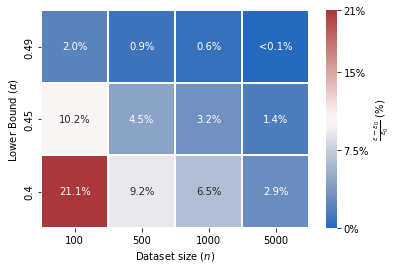

In [6]:
df = pd.DataFrame(epsilons.T)
df = df.set_axis(ns, axis=1, inplace=False)
df = df.set_axis(alphas, axis=0, inplace=False)

ax = sns.heatmap(df, annot=True, cmap = 'vlag',  fmt=".1%", linewidths=.2, vmin = 0, vmax = .21)
plt.ylabel(r'Lower Bound ($\alpha$)')
plt.xlabel(r'Dataset size ($n$)')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .075, .15, .21])
cbar.set_ticklabels(['0%', '7.5%', '15%', '21%'])
cbar.ax.set_ylabel(r'$\frac{\epsilon - \epsilon_0}{\epsilon_0}$ (%)')


for t in ax.texts:
    current_text = t.get_text()
    
    text_transform = (
        lambda x: f"{'<0.1%'}"
        if x == '0.1%'
        else f"{x}"
    )
    t.set_text(text_transform((current_text)))
#plt.title('Table')
plt.savefig('Deviation_Percentage_Table.pdf')
plt.show()

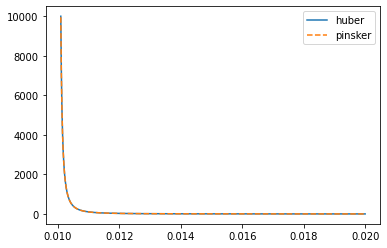

In [7]:
huber = np.log(1/(1 - (2*alpha -1)**2)) / ( (epsilon - eps_0) * np.log(1 + (epsilon - eps_0)/(eps_0 * (1 - epsilon)) ) )
pinsker = (2*alpha -1)**2 / ( (epsilon - eps_0) * np.log(1 + (epsilon - eps_0)/(eps_0 * (1 - epsilon)) ) )
plt.plot(epsilon, huber, label = 'huber')
plt.plot(epsilon, pinsker, ls = '--', label = 'pinsker')
plt.legend()

## Confidence approach

In [8]:
# Calculating for the confidence
alpha = 0.99
c_epsilon = np.arange(0.00001, 0.01, 0.0001)

c_n_limit = 2*np.sqrt((np.log(2/alpha))/(2*c_epsilon**2))
n_lim_sum = 2*np.sqrt((np.log(2/alpha))/(2*c_epsilon**2))

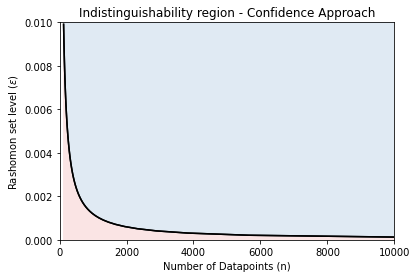

In [9]:
plt.plot(c_n_limit, c_epsilon, color = 'black')
plt.plot(n_lim_sum, c_epsilon, color = 'black')

plt.xlim([0, 10000])
plt.ylim([0.0, .01])

plt.fill_between(c_n_limit, 0, c_epsilon,
                 color="#fae4e4", zorder=0 )
plt.fill_between(c_n_limit, 0.1, c_epsilon,
                 color="lightgray", zorder=0 )
plt.fill_between(n_lim_sum, 0.1, c_epsilon,
                 color="#e0eaf3", zorder=0 )


plt.xlabel('Number of Datapoints (n)')
plt.ylabel(r'Rashomon set level ($\epsilon$)')
plt.title('Indistinguishability region - Confidence Approach')

plt.savefig('Confidence_Indistinguishable_regions.pdf')
plt.show()


## Ridge Regression and confidence indistinguishable

### First, we will do logistic regression with L2 loss 

In [10]:
# Loading data
def Adult_Data_Clean(df: pd.DataFrame) -> pd.DataFrame:
  # Changing collumn names for convenience
  df.rename(columns={'capital-gain': 'gain', 'capital-loss': 'loss', 'native-country': 'country',
                    'hours-per-week': 'hours','marital-status': 'marital'}, inplace=True)
  
  # Finding not known data
  df['country'] = df['country'].replace('?',np.nan)
  df['workclass'] = df['workclass'].replace('?',np.nan)
  df['occupation'] = df['occupation'].replace('?',np.nan)
  
  # Dropping not known data
  df.dropna(how='any',inplace=True)

  # Normalizing numerical features
  numerical = ['age', 'fnlwgt', 'educational-num', 'gain', 'loss', 'hours']
  scaler = MinMaxScaler()
  df[numerical] = scaler.fit_transform(df[numerical])  
  return df

In [11]:
# Loading Dataset
adult_folder = pd.read_csv('adult.csv') # Loading Adult
adult_dataset = Adult_Data_Clean(adult_folder)

# Separating label (income) from the rest of the data and making income binary
income_raw = adult_dataset['income'].tolist()
adult_dataset = adult_dataset.drop(['income'], axis=1)
income = pd.Series(income_raw).astype('category').cat.codes.tolist()
#adult_dataset.drop(adult_dataset.columns.difference(['age', 'educational-num', 'gender', 'loss', 'hours', 'fnlwgt', ]), 1, inplace=True)
income = np.array(income)
# One-Hot encoding
per_adult_encoded = pd.get_dummies(adult_dataset)
# Spliting dataset
X_train, X_test, Y_train, Y_test = train_test_split(per_adult_encoded, income, test_size = 0.5, random_state = 0)

In [12]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def get_prediction(theta, x):
    return (probability(theta, x) > 0.5)*1

def get_accuracy(theta, x, y):
    return np.mean(get_prediction(theta, x) == y)

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten())) ;
    return opt_weights[0]

In [13]:
X = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = np.zeros((X.shape[1], 1))
parameter = fit(X, Y_train, theta)

  NIT   NF   F                       GTG
    0    1  6.931471805599452E-01   3.37013863E-01
    1    5  4.241577571115551E-01   1.54129843E-02
    2   11  3.849186831000089E-01   9.58872386E-03
    3   15  3.640614682615970E-01   3.85319526E-04
tnc: fscale = 50.9436
    4   23  3.415687450019551E-01   3.77301416E-05
    5   26  3.389905724177012E-01   8.81404187E-05
tnc: stepmx = 1000
    6   34  3.274616128013636E-01   6.43517771E-05
    7   37  3.256371132424368E-01   1.12502023E-04
    8   42  3.197886792690859E-01   8.31326011E-06
    9   45  3.192861089713508E-01   4.20879815E-05
   10   50  3.189517382374530E-01   6.30650163E-07
tnc: fscale = 1259.23
   11   58  3.188572582433359E-01   5.94231517E-07
   12   66  3.185476534485570E-01   2.86111878E-07
   13   69  3.185273972338790E-01   1.19084756E-06
   14   79  3.184588652048538E-01   1.73193786E-07
   15   83  3.184530733595757E-01   1.98452743E-08
   16   91  3.184454540266217E-01   2.28876018E-09
   17  102  3.184432569272335

## Ploting for log loss

In [14]:
## Evaluations
acc_0 = get_accuracy(parameter, X, Y_train)
eps_0 = cost_function(parameter, X, Y_train)

In [15]:
## Now, lets find the maximum epsilon
confidence = 0.95
n = X.shape[0]
acc_0_r = 1 - get_accuracy(parameter, X, Y_train)
eps = acc_0_r + 2 * np.sqrt( np.log(2/confidence)/(2*n) )
( eps - acc_0_r ) / acc_0_r

0.05500014438893918

In [16]:
ns = np.array([100, 500, 1000, 5000, 10000])
alphas = np.array([0.01, 0.3, 0.5])
deltas = np.zeros((len(alphas)*2, len(ns))) #I made the matrix bigger to add both the Hoeff. ineq. and CP method

for i in range(len(alphas)):
    for j in range(len(ns)):
        deltas[2*i, j] = (2 * np.sqrt( np.log(2/alphas[i])/(2*ns[j]) )) / eps_0 #changed epsilons for deltas! 

## Clopper-Pearson

In [17]:
from scipy.stats import beta
#Define Clopper-Pearson limits
def LB(alpha, x, n):
    return(beta.ppf(alpha/2,x,n-x+1))
def UB(alpha, x, n):
    return(beta.ppf(1-alpha/2,x+1,n-x))
# This function finds epsilon for a given epsilon_0 using the bisection method
def RashomonPar_CP(alpha, eps_0, n, error):
    x_ref = eps_0*n
    UpperBound = UB(alpha, x_ref, n)
    a = x_ref # starting point where I know UpperBound - LB(alpha, x, n) is postive
    b = n # starting point where I know UpperBound - LB(alpha, x, n) is negative
    x = (a+b)/2 # middle point
    while(abs(UpperBound - LB(alpha, x, n))>error): #standard bisection method 
        if(UpperBound - LB(alpha, x, n)>0):
            a = x
            x = (a+b)/2
        if(UpperBound - LB(alpha, x, n)<0):
            b = x
            x = (a+b)/2
    return(np.ceil(x)/n)

In [18]:
for i in range(len(alphas)):
    for j in range(len(ns)):
        deltas[2*i+1, j] = (RashomonPar_CP(alphas[i], eps_0, ns[j], .001)-eps_0)/eps_0 # add CP deltas to matrix

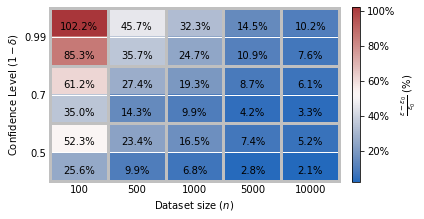

In [48]:
M, N = 5, 3  # M columns and N rows of large cells
K, L = 1, 2  # K columns and L rows to subdivide each of the cells
values = deltas

fig, ax = plt.subplots()
pos = ax.imshow(values, extent=[-0.5, M - 0.5, N - 0.5, -0.5], cmap='vlag')

# positions for the labels
ax.set_xticks(np.arange(0, M))
ax.set_yticks(np.arange(0, N))

# Set labels for x/y ticks
ax.set_xticklabels([100,500,1000,5000,10000])
ax.set_yticklabels([0.99, 0.7, 0.5])

#Labels for x/y axis 
plt.ylabel(r'Confidence Level ($1-\delta$)')
plt.xlabel(r'Dataset size ($n$)')

# thin lines between the sub cells
for i in range(M):
    for j in range(1, K):
        ax.axvline(i - 0.5 + j / K, color='white', lw=1)
for i in range(N):
    for j in range(1, L):
        ax.axhline(i - 0.5 + j / L, color='white', lw=1)
# thick line between the large cells
# use clip_on=False and hide the spines to avoid that the border cells look different
for i in range(M + 1):
    ax.axvline(i - 0.5, color='silver', lw=3, clip_on=False)
for i in range(N + 1):
    ax.axhline(i - 0.5, color='silver', lw=3, clip_on=False)
ax.tick_params(length=0)
for s in ax.spines:
    ax.spines[s].set_visible(False)

# This is used to format the numbers inside the cells
for (i, j), z in np.ndenumerate(deltas):
    ax.text(j, i/2-.175, '{0:.1%}'.format(z), ha='center', va='center') # first two param. control position of text

im_ratio = 0.51 * deltas.shape[0]/deltas.shape[1] # I used this to make the color bar smaller but it doesn't work too well
cbar = fig.colorbar(pos, ax=ax, fraction=0.046*im_ratio, pad=0.04, format=lambda x, _: f"{x:.0%}") #add colorbar
cbar.set_label(r'$\frac{\epsilon - \epsilon_0}{\epsilon_0}$ (%)') # label for colorbar axis



plt.tight_layout()
plt.savefig('Deviation_Percentage_Table_confidence.pdf', dpi = 150)    
plt.show()

